## This notebook is used to sum or average and get the white beam from every 475 image after bining (or any other number of images)

In [63]:
import os, fnmatch
import numpy  as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
from os import listdir
from astropy.io import fits

In [64]:
# rootpath= input('write the path of folders needed to be averaged= (do not include the " ")')

In [65]:
rootpath= "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/"
whitebeampath= rootpath+"whitebeam/"
# print(rootpath)
print(whitebeampath)

/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/whitebeam/


Now we are going to divide the stack by the OB1 then draw the plot 

In [66]:
#read fits files 
myfiles1 = fnmatch.filter(listdir(whitebeampath),'*.fits')
coll_files1 = sorted(myfiles1)
print(coll_files1)

['white_img_OB1_bin.fits', 'white_img_S1_bin.fits', 'white_img_S2_bin.fits', 'white_img_S3_bin.fits', 'white_img_S4_bin.fits', 'white_img_S5_bin.fits', 'white_img_S6_bin.fits', 'white_img_SOB2_bin.fits']


<IPython.core.display.Javascript object>


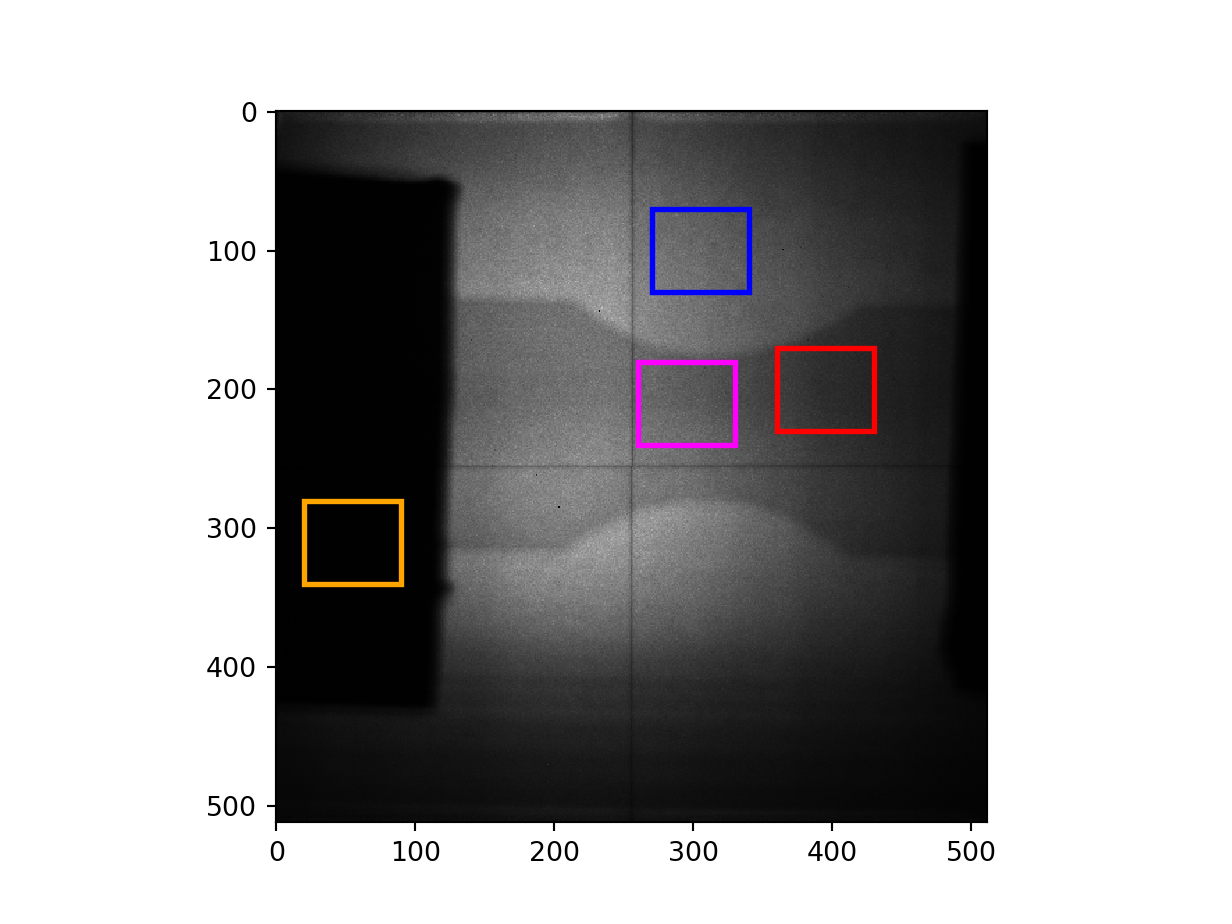

In [67]:
#determine the ROI sample and OA and grip 
roi_OA1=np.array([270,70,340,130]) # (x1,y1,x2,y2 across the diagnol starting from up to down) 
roi_grip=np.array([20,280,90,340]) # (x1,y1,x2,y2 across the diagnol starting from up to down)
roi=np.array([360,170,430,230]) # (x1,y1,x2,y2 across the diagnol starting from up to down)
roi_mid=np.array([260,180,330,240]) # (x1,y1,x2,y2 across the diagnol starting from up to down)
fig,ax =plt.subplots()
myim=fits.open(whitebeampath+coll_files1[3])[0].data.astype(float)
ax.imshow(myim, vmin=0, vmax=150,cmap='gray')
roi_p_OA1= patches.Polygon([(270,70),(340,70),(340,130),(270,130)], edgecolor='blue', facecolor='none',  linewidth=2)
roi_p_grip= patches.Polygon([(20,280),(90,280),(90,340),(20,340)], edgecolor='orange', facecolor='none',  linewidth=2)
roi_p= patches.Polygon([(360,170),(430,170),(430,230),(360,230)], edgecolor='red', facecolor='none',  linewidth=2)
roi_p_mid= patches.Polygon([(260,180),(330,180),(330,240),(260,240)], edgecolor='magenta', facecolor='none',  linewidth=2)
#(x1,y1),(x2,y1),(x1,y2),(x2,y2)
ax.add_patch(roi_p)
ax.add_patch(roi_p_OA1)
ax.add_patch(roi_p_grip)
ax.add_patch(roi_p_mid)

In [22]:
#creating files with zero intensity for the three wavelength regions at roi_OA1 OA
spectrum_sample1_OA1 = np.zeros(len(coll_files1))

# print(len(coll_files1))
for i in range(0, len(coll_files1)):
    im1_OA1=(fits.open(whitebeampath+coll_files1[i])[0].data[roi_OA1[1]:roi_OA1[3],roi_OA1[0]:roi_OA1[2]]).astype(float)
        
#adding the intensity in each fits file to one value for each time slot(wavlength)
    spectrum_sample1_OA1[i]=np.sum(im1_OA1[~np.isnan(im1_OA1) & ~np.isinf(im1_OA1)])
#normalize by divinding by the first OB    
spectrum_sample1_OA1=spectrum_sample1_OA1/spectrum_sample1_OA1[0]

print('OA=',spectrum_sample1_OA1  )
# save spectra to txt files
# np.savetxt('spectrum_sample1_OA1.dat', spectrum_sample1_OA1)
# # normalize factor
# normalize_sample1_OA1=1/spectrum_sample1_OA1
# print(normalize_sample1_OA1)
# # check
# na=normalize_sample1_OA1*spectrum_sample1_OA1
# print(na)

OA= [1.         0.96589713 0.9463487  0.94336506 0.94108619 0.8799507
 0.87811282 0.85903556]


In [68]:
# this part is used to create one number for each image 
#creating files with zero intensity for the three wavelength regions at ROI sample at side (least affected by compression)
spectrum_sample1 = np.zeros(len(coll_files1))

for i in range(0, len(coll_files1)):
    im1=(fits.open(whitebeampath+coll_files1[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
        
#adding the intensity in each fits file to one value for each time slot(wavlength)
    spectrum_sample1[i]=np.sum(im1[~np.isnan(im1) & ~np.isinf(im1)])

#normalize by divinding by the first OB    
spectrum_sample1=spectrum_sample1/spectrum_sample1[0]

print('side=',spectrum_sample1)
# save spectra to txt files
# np.savetxt('spectrum_sample1.dat', spectrum_sample1)
diff=(spectrum_sample1_OA1-spectrum_sample1)
diff=diff+0.02
print('diff=',diff)
norm=np.round(diff,2)
norm[0]=0.0
norm[7]=0.0
print('norm=',norm)
side_norm=spectrum_sample1+norm
print('side_norm=',side_norm)

side= [1.         0.68734087 0.72043825 0.73744148 0.73016465 0.73338552
 0.71796346 0.98894282]
diff= [ 0.02        0.29855626  0.24591045  0.22592358  0.23092154  0.16656518
  0.18014937 -0.10990726]
norm= [0.   0.3  0.25 0.23 0.23 0.17 0.18 0.  ]
side_norm= [1.         0.98734087 0.97043825 0.96744148 0.96016465 0.90338552
 0.89796346 0.98894282]


In [69]:
#creating files with zero intensity for the three wavelength regions at roi_grip
spectrum_sample1_grip = np.zeros(len(coll_files1))
# print(len(coll_files1))
for i in range(0, len(coll_files1)):
    im1_grip=(fits.open(whitebeampath+coll_files1[i])[0].data[roi_grip[1]:roi_grip[3],roi_grip[0]:roi_grip[2]]).astype(float)       
#adding the intensity in each fits file to one value for each time slot(wavlength)
    spectrum_sample1_grip[i]=np.sum(im1_grip[~np.isnan(im1_grip) & ~np.isinf(im1_grip)])
#normalize by divinding by the first OB    
spectrum_sample1_grip=spectrum_sample1_grip/spectrum_sample1_grip[0]
print('grip=',spectrum_sample1_grip)

grip= [1.         0.01677695 0.01637451 0.01600975 0.01759026 0.01610468
 0.01770832 1.06304324]


In [70]:
#creating files with zero intensity for the three wavelength regions at roi_middle of the sample
spectrum_sample1_mid = np.zeros(len(coll_files1))
# print(len(coll_files1))
for i in range(0, len(coll_files1)):
    im1_mid=(fits.open(whitebeampath+coll_files1[i])[0].data[roi_mid[1]:roi_mid[3],roi_mid[0]:roi_mid[2]]).astype(float)       
#adding the intensity in each fits file to one value for each time slot(wavlength)
    spectrum_sample1_mid[i]=np.sum(im1_mid[~np.isnan(im1_mid) & ~np.isinf(im1_mid)])
#normalize by divinding by the first OB    
spectrum_sample1_mid=spectrum_sample1_mid/spectrum_sample1_mid[0]
print('mid=',spectrum_sample1_mid)
diff_mid=(spectrum_sample1_OA1-spectrum_sample1_mid)
diff_mid=diff_mid+0.016
print('diff_mid=',diff_mid)
norm_mid=np.round(diff_mid,2)
norm_mid[0]=0.0
norm_mid[7]=0.0
print('norm_mid=',norm_mid)
mid_norm=spectrum_sample1_mid+norm_mid
print('mid_norm=',mid_norm)

mid= [1.         0.69510094 0.69750238 0.73560065 0.73654839 0.70566591
 0.70835753 0.89472306]
diff_mid= [ 0.016       0.28679619  0.26484632  0.22376441  0.2205378   0.19028479
  0.18575529 -0.0196875 ]
norm_mid= [0.   0.29 0.26 0.22 0.22 0.19 0.19 0.  ]
mid_norm= [1.         0.98510094 0.95750238 0.95560065 0.95654839 0.89566591
 0.89835753 0.89472306]


<IPython.core.display.Javascript object>


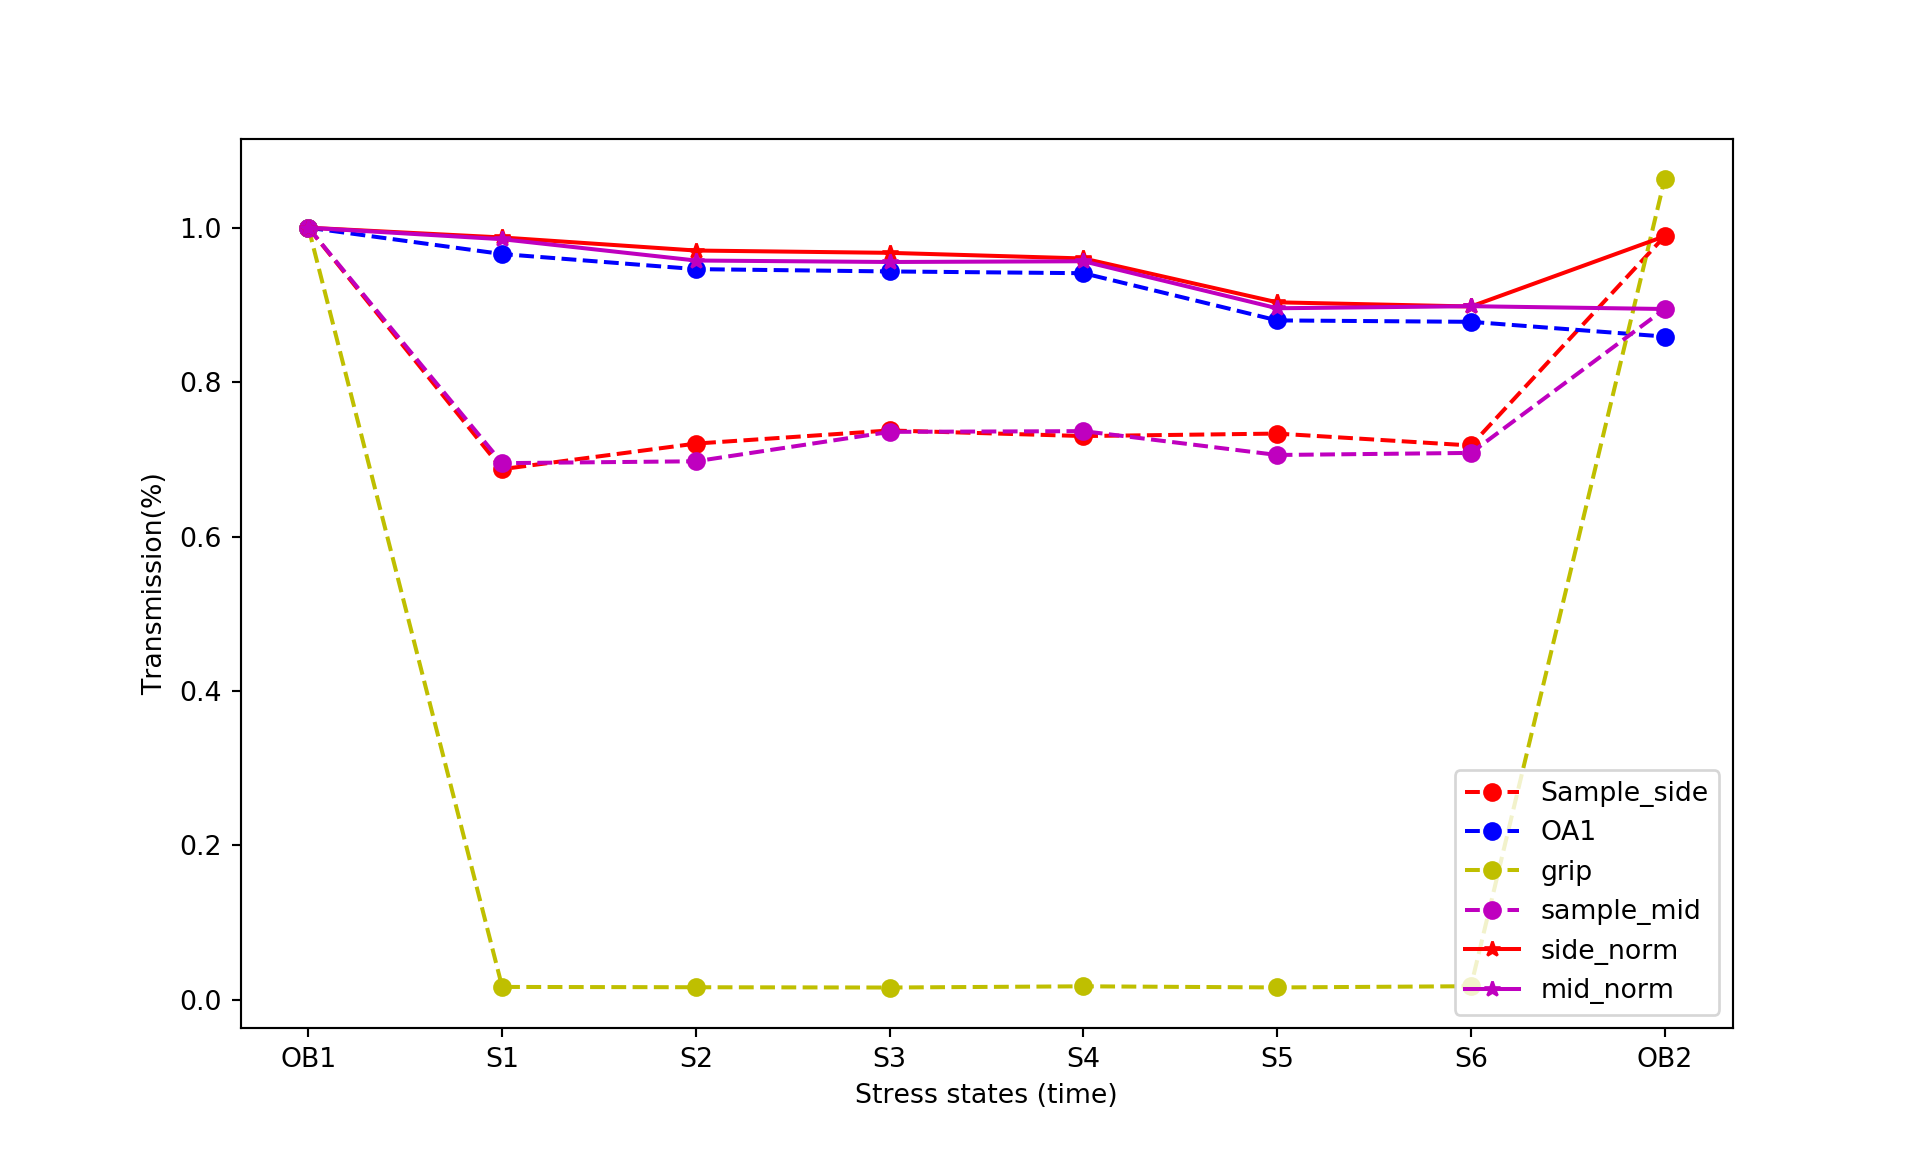

In [71]:
# the figure for the different regions ROI for spectrum 1 
fig,ax =plt.subplots(figsize=(10, 6))
x = ('OB1', 'S1', 'S2', 'S3', 'S4','S5', 'S6', 'OB2')
plt.plot(x,spectrum_sample1,linestyle='--', marker='o', color='r')
plt.plot(x,spectrum_sample1_OA1,linestyle='--', marker='o', color='b')
plt.plot(spectrum_sample1_grip,linestyle='--', marker='o', color='y')
plt.plot(x,spectrum_sample1_mid,linestyle='--', marker='o', color='m')
plt.plot(x,side_norm,linestyle='-', marker='*', color='r')
plt.plot(x,mid_norm,linestyle='-', marker='*', color='m')
plt.xlabel('Stress states (time)')
plt.ylabel('Transmission(%)')
# plt.plot(spectrum_sample3)
# plt.legend(['Sample_side', 'OA1', 'sample_mid',side_norm], loc='upper right')
plt.legend(['Sample_side','OA1','grip','sample_mid','side_norm', 'mid_norm'], loc='lower right')
# plt.legend(['Sample_side', 'OA1','grip', 'sample_mid'], loc='lower right')
# plt.savefig('C:/Users/student/Pictures/OB/summation-OB-plot-withoutgrip-normalized.png')

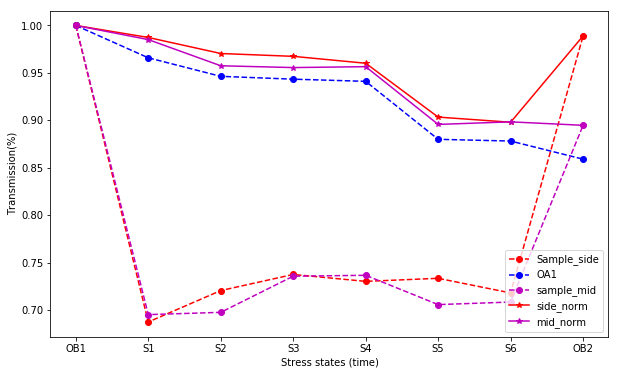

In [59]:
# the figure for the different regions ROI for spectrum 1 
fig,ax =plt.subplots(figsize=(10, 6))
x = ('OB1', 'S1', 'S2', 'S3', 'S4','S5', 'S6', 'OB2')
plt.plot(x,spectrum_sample1,linestyle='--', marker='o', color='r')
plt.plot(x,spectrum_sample1_OA1,linestyle='--', marker='o', color='b')
# plt.plot(spectrum_sample1_grip,linestyle='--', marker='o', color='y')
plt.plot(x,spectrum_sample1_mid,linestyle='--', marker='o', color='m')
plt.plot(x,side_norm,linestyle='-', marker='*', color='r')
plt.plot(x,mid_norm,linestyle='-', marker='*', color='m')
plt.xlabel('Stress states (time)')
plt.ylabel('Transmission(%)')
# plt.plot(spectrum_sample3)
# plt.legend(['Sample_side', 'OA1', 'sample_mid',side_norm], loc='upper right')
plt.legend(['Sample_side','OA1','sample_mid','side_norm', 'mid_norm'], loc='lower right')
# plt.legend(['Sample_side', 'OA1','grip', 'sample_mid'], loc='lower right')
# plt.savefig('C:/Users/student/Pictures/OB/summation-OB-plot-withoutgrip-normalized.png')

In [72]:
print('mask value for side=',side_norm)
print('mask value for mid=',mid_norm)
print('mask value for OA=',spectrum_sample1_OA1)
print('mask value for grip=',spectrum_sample1_grip)
np.savetxt('mask_values.dat',np.column_stack((side_norm,mid_norm , spectrum_sample1_OA1,spectrum_sample1_grip)),delimiter="\t",fmt='%.8f', header="mask side   mask mid     mask OA    mask grip ")

mask value for side= [1.         0.98734087 0.97043825 0.96744148 0.96016465 0.90338552
 0.89796346 0.98894282]
mask value for mid= [1.         0.98510094 0.95750238 0.95560065 0.95654839 0.89566591
 0.89835753 0.89472306]
mask value for OA= [1.         0.96589713 0.9463487  0.94336506 0.94108619 0.8799507
 0.87811282 0.85903556]
mask value for grip= [1.         0.01677695 0.01637451 0.01600975 0.01759026 0.01610468
 0.01770832 1.06304324]


## Next step is creating masks